<a href="https://www.kaggle.com/code/drskprabhakar/75-moderate-vs-severe-dr-cnn-model?scriptVersionId=185078098" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa92ea-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa930b-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa92e4-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa92f3-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa92eb-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa9312-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa9308-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa9307-8d87-11e8-9daf-6045cb817f

In [2]:
os.listdir('/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR')

['Severe DR', 'Moderate DR']

In [3]:
os.listdir('/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Moderate DR')

['1ffa93d0-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93bd-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93ca-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93b6-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93e5-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93d9-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93e2-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93cc-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93d2-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93cf-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93c7-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93e0-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93e8-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93ba-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93da-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93d7-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93be-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93e3-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93c5-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93c4-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93c1-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa93c3-8d87-11e8-9daf-6045cb81

In [4]:
os.listdir('/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR')

['1ffa92ea-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa930b-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa92e4-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa92f3-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa92eb-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa9312-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa9308-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa9307-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa9306-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa92f4-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa9302-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa9300-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa92fd-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa92f6-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa930c-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa92fc-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa930d-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa92f9-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa9309-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa92fa-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa92e3-8d87-11e8-9daf-6045cb817f5b..JPG',
 '1ffa92e9-8d87-11e8-9daf-6045cb81

In [12]:
import glob
Moderate_DR = glob.glob("/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Moderate DR/*.JPG")
print(len(Moderate_DR))
Moderate_DR[:5]

49


['/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Moderate DR/1ffa93d0-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Moderate DR/1ffa93bd-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Moderate DR/1ffa93ca-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Moderate DR/1ffa93b6-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Moderate DR/1ffa93e5-8d87-11e8-9daf-6045cb817f5b..JPG']

/tmp/ipykernel_33/785905330.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 10, ind+1)


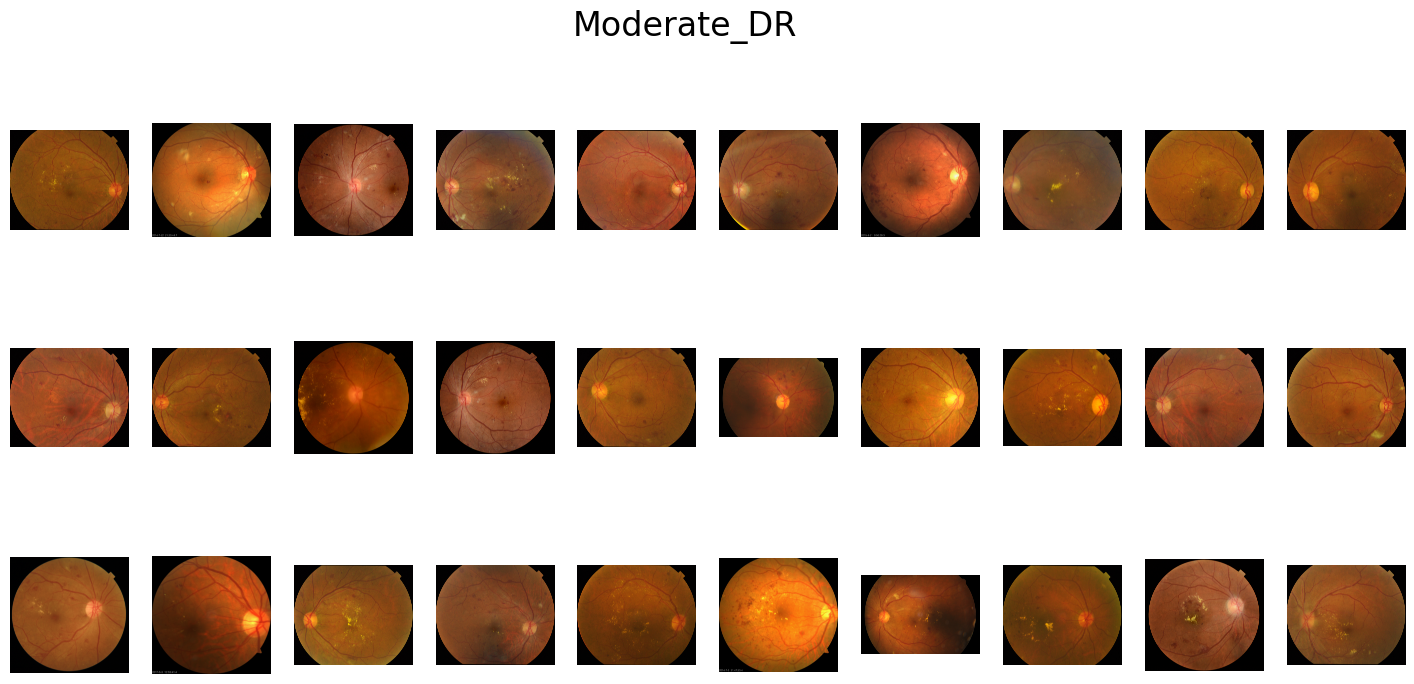

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('Moderate_DR', fontsize=24)

for ind, img_src in enumerate(Moderate_DR[:30]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

In [16]:
import glob
Severe_DR = glob.glob("/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/*.JPG")
print(len(Severe_DR))
Severe_DR[:5]

39


['/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa92ea-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa930b-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa92e4-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa92f3-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa92eb-8d87-11e8-9daf-6045cb817f5b..JPG']

56322# import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('Severe_DR', fontsize=24)

for ind, img_src in enumerate(Severe_DR[:30]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_images = datagen.flow_from_directory('/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR',
                                          target_size=(64,64),
                                          class_mode='binary',
                                          subset='training')

val_images = datagen.flow_from_directory('/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR',
                                          target_size=(64,64),
                                          class_mode='binary',
                                        subset='validation')                                       

Found 72 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [277]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │       246,017 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 248,065 (969.00 KB)

 Trainable params: 247,937 (968.50 KB)

 Non-trainable params: 128 (512.00 B)

In [278]:
model.fit(train_images, 
          batch_size=32, 
          epochs=30, 
          validation_data=val_images)
model.save('DRcnnmodel_model.h5')

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 995ms/step - accuracy: 0.5667 - loss: 2.8239 - val_accuracy: 0.4375 - val_loss: 1.4682
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 474ms/step - accuracy: 0.7470 - loss: 4.2793 - val_accuracy: 0.5625 - val_loss: 0.8647
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 476ms/step - accuracy: 0.7439 - loss: 2.5706 - val_accuracy: 0.5625 - val_loss: 0.7233
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 471ms/step - accuracy: 0.8042 - loss: 2.3199 - val_accuracy: 0.6250 - val_loss: 0.7312
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 454ms/step - accuracy: 0.8672 - loss: 0.5413 - val_accuracy: 0.4375 - val_loss: 1.0640
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 464ms/step - accuracy: 0.8964 - loss: 0.6048 - val_accuracy: 0.5625 - val_loss: 0.7816
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 476ms/step - accuracy: 0.9193 - loss: 0.1565 - val_accuracy: 0.5625 - val_loss: 0.5550
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 469ms/step - accuracy: 0.8953 - loss: 0.4894 - val_accuracy: 0.5625 - val_loss:

In [247]:
y_true =val_images.classes

In [294]:
y_pred = model.predict(val_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step


In [295]:
y_pred[y_pred<=0.5]=0
y_pred[y_pred>0.5]=1

In [296]:
from sklearn import metrics
metrics.accuracy_score(y_true, y_pred)

0.75

In [297]:
metrics.confusion_matrix(y_true, y_pred)

array([[7, 2],
       [2, 5]])

In [298]:
print(metrics.classification_report(y_true, y_pred,
                                    target_names=['moderate DR', 'severe DR']))

              precision    recall  f1-score   support

 moderate DR       0.78      0.78      0.78         9
   severe DR       0.71      0.71      0.71         7

    accuracy                           0.75        16
   macro avg       0.75      0.75      0.75        16
weighted avg       0.75      0.75      0.75        16



In [306]:
val_images.class_indices

{'Moderate DR': 0, 'Severe DR': 1}

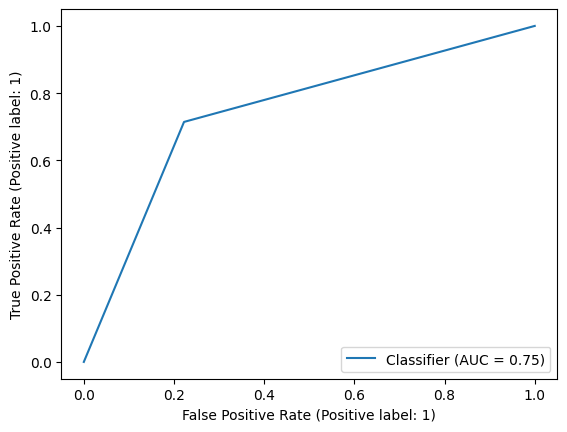

In [307]:
metrics.RocCurveDisplay.from_predictions(y_true, y_pred)
                                        

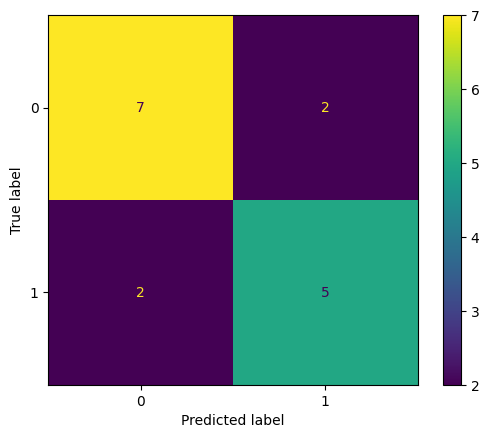

In [308]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

In [309]:
from keras.models import load_model
model = load_model('DRcnnmodel_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Moderat DR


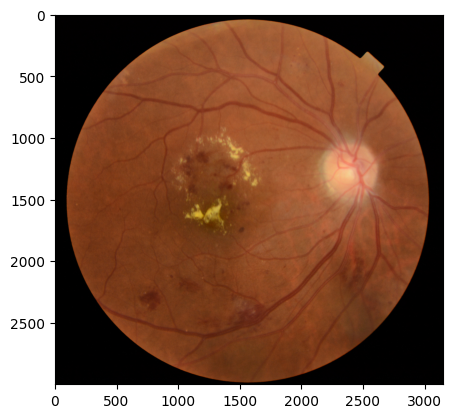

In [310]:
from keras.preprocessing import image
import numpy as np

img_path = "/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Moderate DR/1ffa93b1-8d87-11e8-9daf-6045cb817f5b..JPG"
img = image.load_img(img_path, target_size=(64,64))
image_array = image.img_to_array(img)
image_array = np.expand_dims(image_array, axis=0)
image_array /= 255

predictions = model.predict(image_array)
if predictions <=0.5:
    print('Moderat DR')
else:
    print('Severe DR')
    
import matplotlib.pyplot as plt
image1 = image.load_img('/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Moderate DR/1ffa93b1-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(image1)    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Severe DR


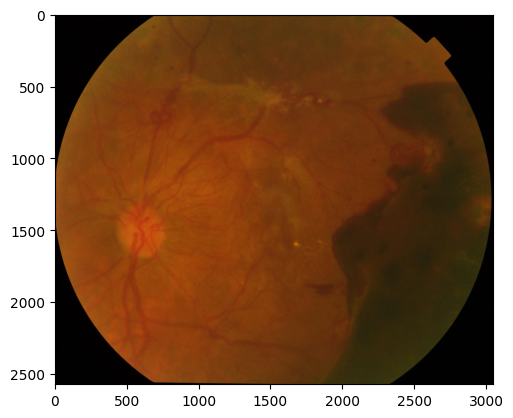

In [311]:
from keras.preprocessing import image
import numpy as np

img_path = "/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa92e3-8d87-11e8-9daf-6045cb817f5b..JPG"
img = image.load_img(img_path, target_size=(64,64))
image_array = image.img_to_array(img)
image_array = np.expand_dims(image_array, axis=0)
image_array /= 255

predictions = model.predict(image_array)
if predictions <=0.5:
    print('Moderat DR')
else:
    print('Severe DR')
    
import matplotlib.pyplot as plt
image1 = image.load_img('/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa92e3-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(image1)    